In [26]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA


In [27]:
# Data Reading

df = pd.read_excel("Registro Público de Emissões.xlsx")


In [ ]:
# Data Processing

df = df[df["Escopo"] == "Total"]
df.reset_index(inplace=True)
df.drop(columns=["index", "Setor da Indústria", "Escopo"], inplace=True)

X_train_str = df.columns[-7:].values
X_train = X_train_str.astype(int)

list_of_companies = df.Empresa.values

#df.iloc[:, 1:] /= 1e7

display(df.head())


,Empresa,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Suzano,1071559.17,734909.56,1050928.8,1369237.85,1355714.11,1287628.03,1766173.27,2195385.65,1408928.09,1336754.86,1269096.85,3510477.86,3777425.13,4280282.87,4048948.87,4085794.51
1,Companhia Siderúrgica Nacional (CSN),NaN,NaN,NaN,NaN,NaN,201073.40,398435.90,358696.39,696166.54,15521114.32,15044354.64,11179903.99,51838553.42,56986963.83,62768571.05,68983109.92
2,Intercement,NaN,NaN,NaN,NaN,NaN,1796332.91,1878122.78,1662365.83,1284986.73,1285356.44,1211968.29,1255259.84,1399664.56,1568611.67,1602633.88,1576466.04
3,Ternium Brasil,NaN,NaN,NaN,NaN,NaN,9399928.51,10177952.92,11090420.64,11209372.11,12076763.89,11429445.82,11082661.39,10371065.91,11691472.75,11319741.92,12759252.85
4,Votorantim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17003897.97,14107418.23,13086996.77,13637983.13,12469542.86,13387612.89,17197925.07,15552532.45,14949003.45


,Empresa,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Suzano,0.107156,0.073491,0.105093,0.136924,0.135571,0.128763,0.176617,0.219539,0.140893,0.133675,0.126910,0.351048,0.377743,0.428028,0.404895,0.408579
1,Companhia Siderúrgica Nacional (CSN),NaN,NaN,NaN,NaN,NaN,0.020107,0.039844,0.035870,0.069617,1.552111,1.504435,1.117990,5.183855,5.698696,6.276857,6.898311
2,Intercement,NaN,NaN,NaN,NaN,NaN,0.179633,0.187812,0.166237,0.128499,0.128536,0.121197,0.125526,0.139966,0.156861,0.160263,0.157647
3,Ternium Brasil,NaN,NaN,NaN,NaN,NaN,0.939993,1.017795,1.109042,1.120937,1.207676,1.142945,1.108266,1.037107,1.169147,1.131974,1.275925
4,Votorantim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700390,1.410742,1.308700,1.363798,1.246954,1.338761,1.719793,1.555253,1.494900


In [29]:
# Auxiliaries Function

def filters_a_company(df, company_name):
    df = df[df.Empresa == company_name]
    df = df.drop(columns=["Empresa"])
    return df

def extracts_commum_values(df, column_names):
    df = df[column_names]
    return df.values[0]

def extracts_specific_values(df):
    df = df.dropna(axis=1)
    X = df.columns
    X = X.astype(int)
    y = df.values[0]
    return X, y

def applies_linear_regression(X, y, X_pred):
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_pred.reshape(-1, 1))
    return y_pred

def applies_autoregressive_model(data, p=0, d=0, q=0, steps_for_forec=1):
    model = ARIMA(data, order=(p, d, q)).fit()
    y_pred = model.forecast(steps=steps_for_forec)
    return y_pred

def generate_plot(company_name, X, y, X_pred, y_pred):
    line, = plt.plot(X, y, label=company_name)
    plt.plot(X_pred, y_pred, "o", color=line.get_color())


c:\Users\thiag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\thiag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\thiag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\thiag\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameter

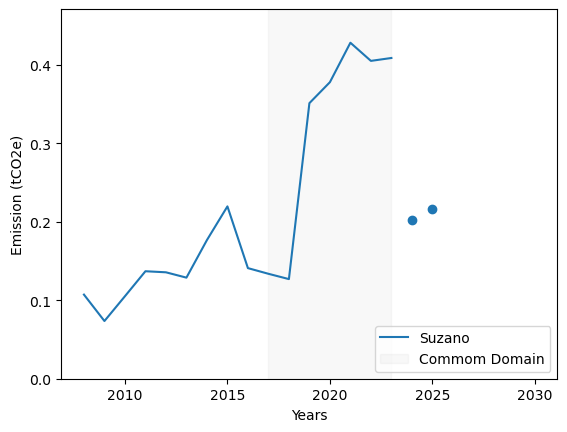

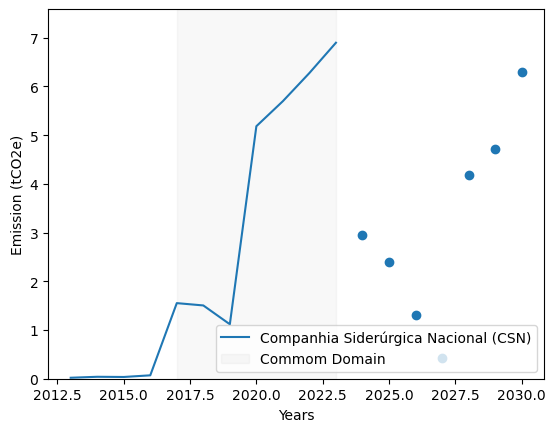

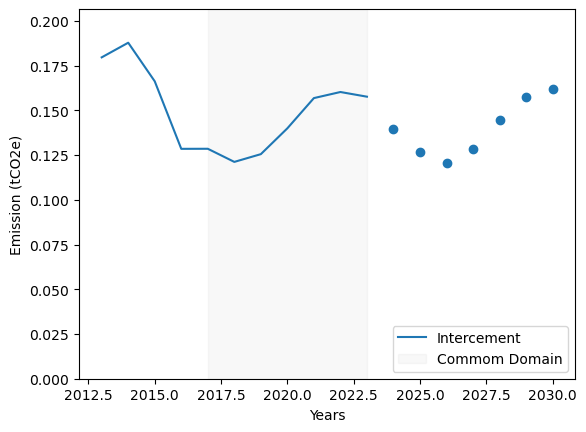

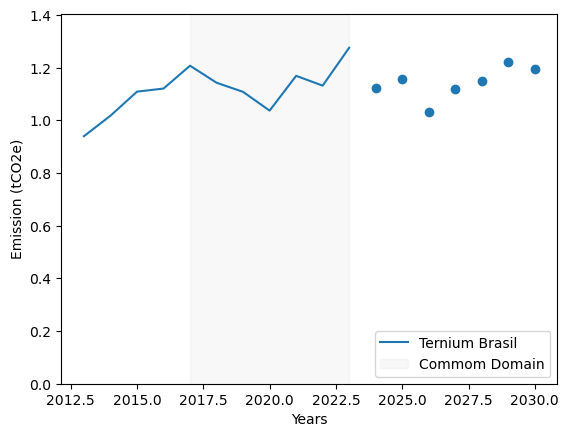

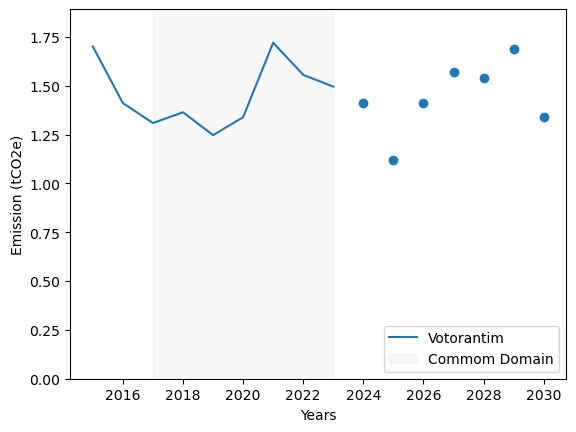

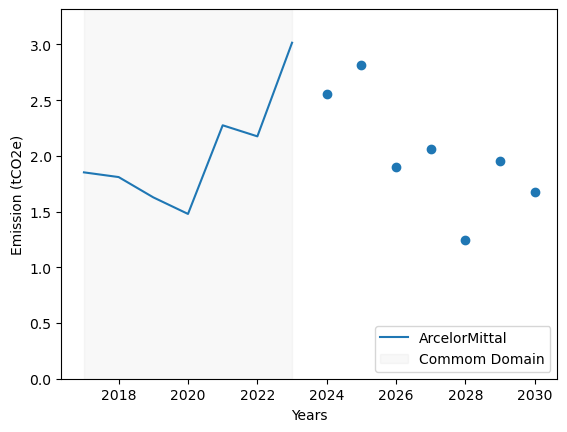

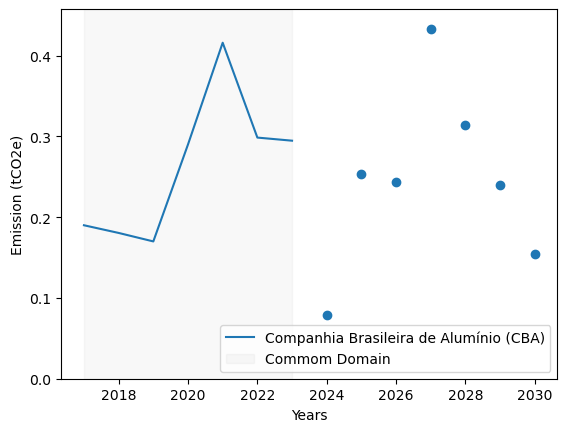

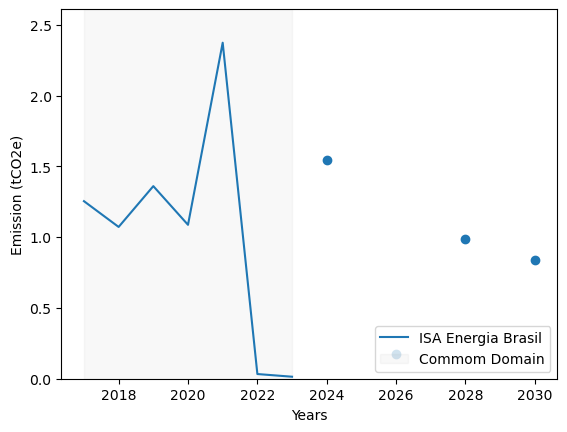

In [30]:
# Main

X_pred = np.array(range(2024, 2031))

for company_name in list_of_companies:
    p, d, q = 6, 0, 3
    
    df_company = filters_a_company(df, company_name)
    y_train = extracts_commum_values(df_company, X_train_str)
    X_plot, y_plot = extracts_specific_values(df_company)
    y_pred = applies_autoregressive_model(y_train, p=p, d=d, q=q, steps_for_forec=len(X_pred))
    
    plt.figure()
    generate_plot(company_name, X_plot, y_plot, X_pred, y_pred)
    plt.ylim([0, 1.1*max(y_plot)])
    plt.axvspan(min(X_train), max(X_train), color='gray', alpha=0.05, label="Commom Domain")
    plt.legend(loc="lower right")
    plt.xlabel("Years")
    plt.ylabel("Emission (tCO2e)")
    plt.savefig(f"ARIMA(p={p}, d={d}, q={q}) - {company_name}", transparent=True, dpi=300)
